In [6]:
import numpy as np
import pandas as pd
import matplotlib

dictionary_df = pd.read_csv("dictionary.csv")
winter_df = pd.read_csv("winter.csv")
summer_df = pd.read_csv("summer.csv")
summer_df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [111]:
summer_df.rename(columns={'Country': 'Code'}, inplace=True)
winter_df.rename(columns={'Country': 'Code'}, inplace=True)

In [114]:
summer_countries_df = summer_df.merge(dictionary_df,how="inner",on="Code")
summer_countries_df["Season"]="summer"
winter_countries_df = winter_df.merge(dictionary_df,how="inner",on="Code")
winter_countries_df["Season"]="winter"
winter_countries_df
all_df = pd.concat([summer_countries_df,winter_countries_df])
all_df.tail(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
4823,2010,Vancouver,Biathlon,Biathlon,"HURAJT, Pavol",SVK,Men,15KM Mass Start,Bronze,Slovakia,5424050.0,16088.277587,winter
4824,2010,Vancouver,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,7.5KM,Gold,Slovakia,5424050.0,16088.277587,winter
4825,2014,Sochi,Biathlon,Biathlon,"KUZMINA, Anastazia",SVK,Women,7.5KM,Gold,Slovakia,5424050.0,16088.277587,winter


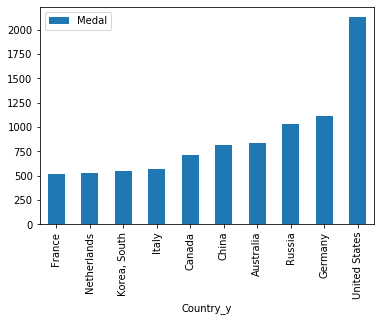

In [69]:
all_groupbydf = all_df[all_df['Year']>1984].groupby(by="Country_y")
all_groupbydf = all_groupbydf.count().nlargest(10,'Medal').sort_values(["Medal"],ascending=True) 
all_groupbydf[['Medal']].plot.bar(y='Medal')

In [145]:
all_valid_df = all_df[all_df['Year']>1984]
count_df = all_valid_df.groupby(['Country', 'Season'])['Medal'].count()

count_df = count_df.unstack(level=1)
count_df

Season,summer,winter
Country,,
Afghanistan,2.0,NaN
Algeria,13.0,NaN
Argentina,173.0,NaN
Armenia,11.0,NaN
Australia,826.0,15.0
...,...,...
Venezuela,4.0,NaN
Vietnam,2.0,NaN
Virgin Islands*,1.0,NaN


In [160]:
top_countries_df = all_valid_df.groupby(['Country'])['Medal'].count().nlargest(10)
top_countries_df = top_countries_df.to_frame()
top_countries_by_season = count_df.join(top_countries_df,how="inner")
top_countries_by_season.drop(columns=["Medal"],inplace=True)
top_countries_by_season

,summer,winter
Country,,
Australia,826.0,15.0
Canada,255.0,456.0
China,731.0,82.0
France,414.0,102.0
Germany,785.0,327.0
Italy,423.0,144.0
"Korea, South",458.0,87.0
Netherlands,436.0,87.0
Russia,768.0,263.0


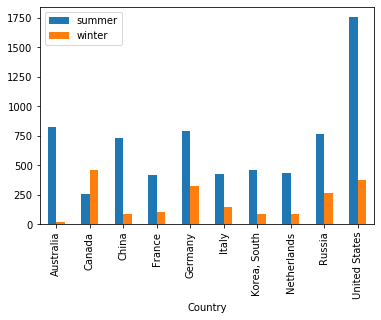

In [161]:

top_countries_by_season.plot.bar()